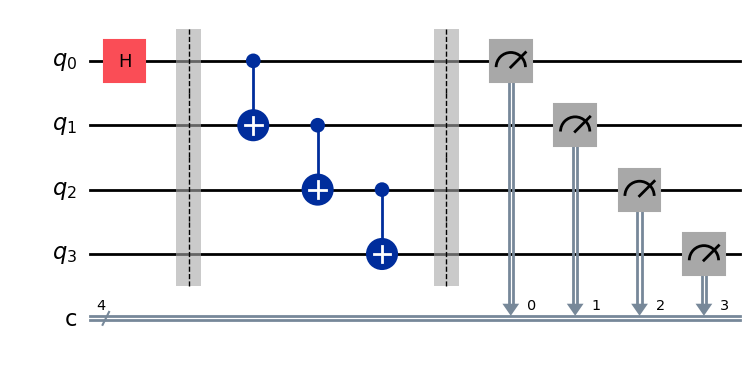

In [5]:
#Define the circuit
from qiskit import QuantumCircuit
def generalized_GHZ_state(n):
    circuit = QuantumCircuit (n,n)
    # Apply the Hadamard gate at qubit 0
    circuit . h (0)
    circuit.barrier() # draw a barrier
    # Apply CNOT Gates
    for i in range (n -1):
        circuit.cx(i,i +1)
    circuit.barrier() # draw a barrier
    measured_qubits =[i for i in range (n)]
    classical_results =[ i for i in range (n)]
    circuit.measure(measured_qubits, classical_results)
    return circuit

n = 4
circuit = generalized_GHZ_state (n)
#print (circuit)
circuit.draw("mpl")



In [ ]:

#Simulation using AerSimulator()
#The code below is generic and can be used with other quantum circuits with a small number of qubits. 
 
#Define the backend
from qiskit_aer import AerSimulator
backend = AerSimulator()

#Transpile 
from qiskit import transpile
compiled_circuit = transpile(circuit, backend)

#Execute the circuit in the simulator
n_shots = 1024 #The default number of shots is 1024 
result = backend.run(compiled_circuit, shots=n_shots).result()

# Extract Information.
counts = result.get_counts(compiled_circuit)
probs = {key:value/n_shots for key,value in counts.items()}
print("Counts",counts)
print("Probabilities:", probs)
print()